## Merge Data

/Users/grazillionaire/Documents/projects/rainy_day
Chunk dims for CHI-2001-01_processed.csv :  (31, 19)
Chunk dims for CHI-2001-02_processed.csv :  (28, 19)
Chunk dims for CHI-2001-03_processed.csv :  (31, 19)
Chunk dims for CHI-2001-04_processed.csv :  (30, 19)
Chunk dims for CHI-2001-05_processed.csv :  (31, 19)
Chunk dims for CHI-2001-06_processed.csv :  (30, 19)
Chunk dims for CHI-2001-07_processed.csv :  (31, 19)
Chunk dims for CHI-2001-08_processed.csv :  (31, 19)
Chunk dims for CHI-2001-09_processed.csv :  (30, 19)
Chunk dims for CHI-2001-10_processed.csv :  (31, 19)
Chunk dims for CHI-2001-11_processed.csv :  (30, 19)
Chunk dims for CHI-2001-12_processed.csv :  (31, 19)
Chunk dims for CHI-2002-01_processed.csv :  (31, 19)
Chunk dims for CHI-2002-02_processed.csv :  (28, 19)
Chunk dims for CHI-2002-03_processed.csv :  (31, 19)
Chunk dims for CHI-2002-04_processed.csv :  (30, 19)
Chunk dims for CHI-2002-05_processed.csv :  (31, 19)
Chunk dims for CHI-2002-06_processed.csv :  (30,

Chunk dims for CHI-2013-11_processed.csv :  (30, 19)
Chunk dims for CHI-2013-12_processed.csv :  (31, 19)
Chunk dims for CHI-2014-01_processed.csv :  (31, 19)
Chunk dims for CHI-2014-02_processed.csv :  (28, 19)
Chunk dims for CHI-2014-03_processed.csv :  (31, 19)
Chunk dims for CHI-2014-04_processed.csv :  (30, 19)
Chunk dims for CHI-2014-05_processed.csv :  (31, 19)
Chunk dims for CHI-2014-06_processed.csv :  (30, 19)
Chunk dims for CHI-2014-07_processed.csv :  (31, 19)
Chunk dims for CHI-2014-08_processed.csv :  (31, 19)
Chunk dims for CHI-2014-09_processed.csv :  (30, 19)
Chunk dims for CHI-2014-10_processed.csv :  (31, 19)
Chunk dims for CHI-2014-11_processed.csv :  (30, 19)
Chunk dims for CHI-2014-12_processed.csv :  (31, 19)
Chunk dims for CHI-2015-01_processed.csv :  (31, 19)
Chunk dims for CHI-2015-02_processed.csv :  (28, 19)
Chunk dims for CHI-2015-03_processed.csv :  (31, 19)
Chunk dims for CHI-2015-04_processed.csv :  (30, 19)
Chunk dims for CHI-2015-05_processed.csv :  (3

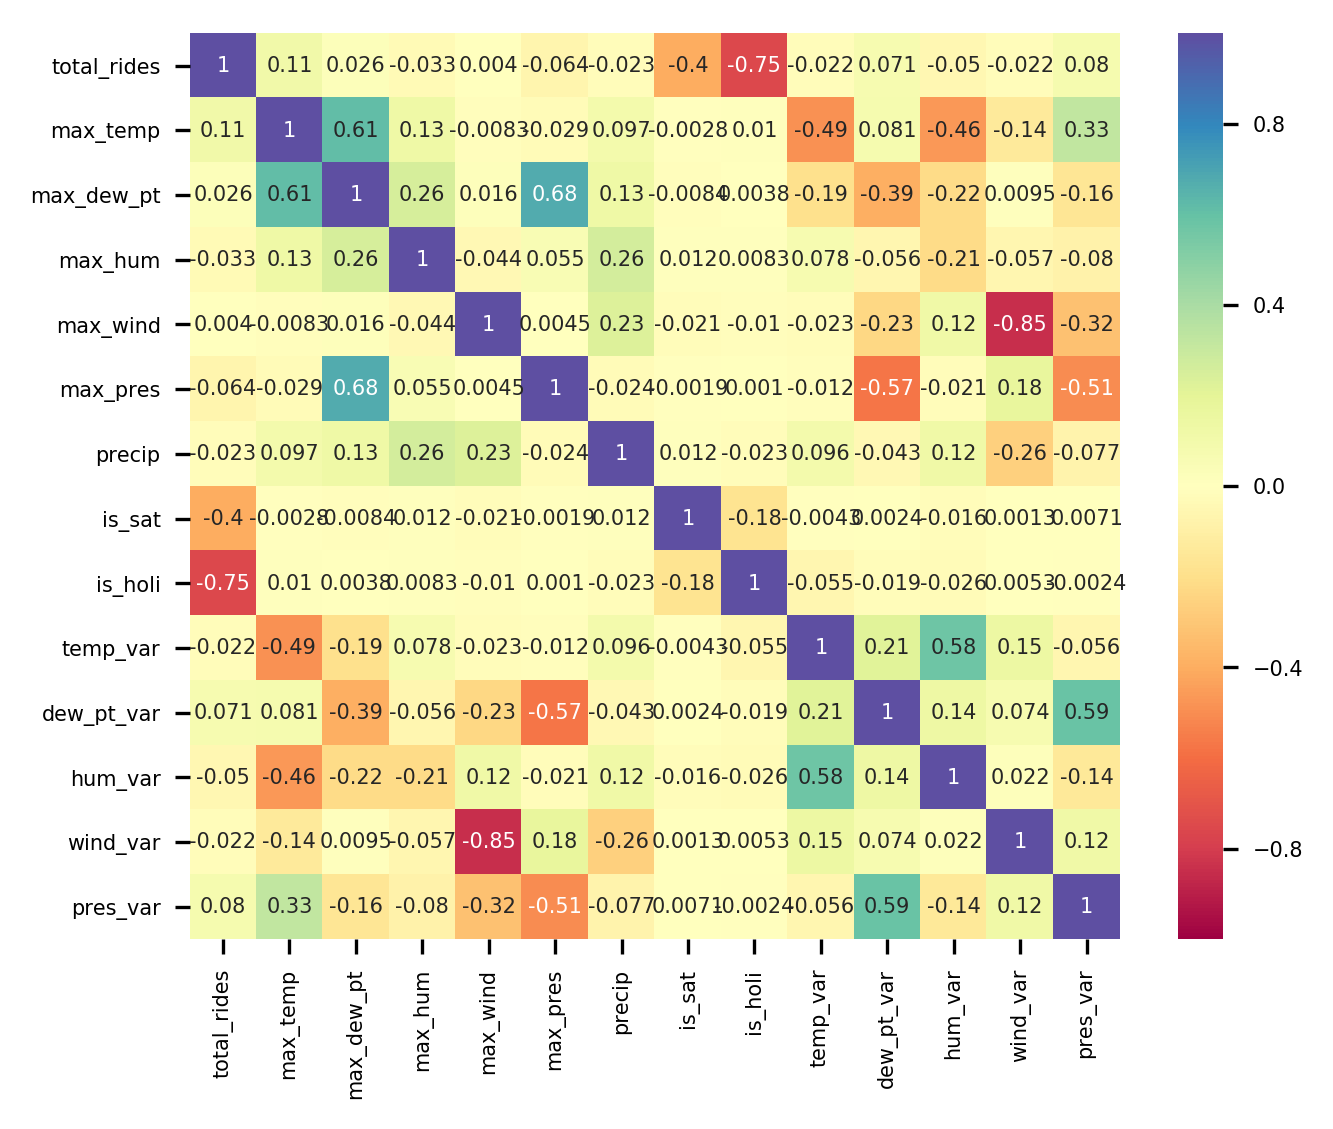

In [5]:
import os
import pandas as pd
from calendar import monthrange
import csv
import datetime
import seaborn as sns

print(os.getcwd())

# nyc_files = list(os.listdir('processed_NYC_files'))
# try:
#     nyc_files.remove('.DS_Store')
# except:
#     pass
# nyc_files.sort()

# nyc_weather_data = pd.DataFrame()

# for file in nyc_files:
#     df_chunk = pd.read_csv('processed_NYC_files/'+file)
#     print('Chunk dims for', file, ': ', df_chunk.shape)
#     nyc_weather_data = pd.concat([nyc_weather_data, df_chunk], ignore_index=True)

# print('Total New York dataframe dimensions:',nyc_weather_data.shape,'\n')

# nyc_weather_data.to_csv('new_york_weather.csv')
    

chi_files = list(os.listdir('processed_CHI_files'))
try:
    chi_files.remove('.DS_Store')
except:
    pass
chi_files.sort()

chi_weather_data = pd.DataFrame()

for file in chi_files:
    df_chunk = pd.read_csv('processed_CHI_files/'+file)
    print('Chunk dims for', file, ': ', df_chunk.shape)
    chi_weather_data = pd.concat([chi_weather_data, df_chunk], ignore_index=True)

print('Total Chicago dataframe dimensions:',chi_weather_data.shape,'\n')

chi_weather_data.to_csv('chicago_weather.csv')

chi_ridership_data = pd.read_csv('CTA_Daily_Boarding_Totals.csv')
chi_ridership_data['service_date'] = pd.to_datetime(chi_ridership_data['service_date'])

# Join tables, using 'service_date' and 'Date' as index keys
all_chi_data = chi_ridership_data[['service_date','day_type','total_rides']]\
            .set_index('service_date').join(chi_weather_data.set_index('Date'))
chi_data = all_chi_data[181:] # drop rows with missing weather data
chi_data = pd.concat([chi_data, pd.get_dummies(chi_data['day_type'], prefix='is')],
                     axis=1).drop(['day_type'],axis=1).drop(['is_W'],axis=1)

chi_data = chi_data.drop(['Avg Temperature (° F)'],axis=1)\
                   .drop(['Avg Dew Point (° F)'],axis=1)\
                   .drop(['Avg Humidity (%)'],axis=1)\
                   .drop(['Avg Wind Speed (mph)'],axis=1)\
                   .drop(['Avg Pressure (Hg)'],axis=1)\
                   .drop(['Max Precipation (in)'],axis=1)\
                   .drop(['Min Precipation (in)'],axis=1)

chi_data['Temperature Variation (° F)'] = chi_data['Min Temperature (° F)'] - chi_data['Max Temperature (° F)']
chi_data = chi_data.drop(['Min Temperature (° F)'],axis=1)

chi_data['Dew Point Variation (° F)'] = chi_data['Min Dew Point (° F)'] - chi_data['Max Dew Point (° F)']
chi_data = chi_data.drop(['Min Dew Point (° F)'],axis=1)

chi_data['Humidity Variation (%)'] = chi_data['Min Humidity (%)'] - chi_data['Max Humidity (%)']
chi_data = chi_data.drop(['Min Humidity (%)'],axis=1)

chi_data['Wind Speed Variation (mph)'] = chi_data['Min Wind Speed (mph)'] - chi_data['Max Wind Speed (mph)']
chi_data = chi_data.drop(['Min Wind Speed (mph)'],axis=1)

chi_data['Pressure Variation (Hg)'] = chi_data['Min Pressure (Hg)'] - chi_data['Max Pressure (Hg)']
chi_data = chi_data.drop(['Min Pressure (Hg)'],axis=1)

chi_data = chi_data.rename(index=str, columns={
    'Max Temperature (° F)': 'max_temp',
    'Max Dew Point (° F)': 'max_dew_pt',
    'Max Humidity (%)': 'max_hum',
    'Max Wind Speed (mph)': 'max_wind',
    'Max Pressure (Hg)': 'max_pres',
    'Avg Precipation (in)': 'precip',
    'is_A': 'is_sat',
    'is_U': 'is_holi',
    'Temperature Variation (° F)': 'temp_var',
    'Dew Point Variation (° F)': 'dew_pt_var',
    'Humidity Variation (%)': 'hum_var',
    'Wind Speed Variation (mph)': 'wind_var',
    'Pressure Variation (Hg)': 'pres_var'})

chi_data.to_csv('chi_data.csv')

from matplotlib import rcParams
rcParams['figure.figsize'] = (5, 4)
rcParams['figure.dpi'] = 300
rcParams['font.size'] = 5
sns.heatmap(chi_data.corr(), cmap="Spectral", annot=True, vmin=-1, vmax=1);




## Weather data merged, saved locally, and ready in dataframes

In [170]:
nyc_weather_data.to_csv('new_york_weather.csv')
nyc_weather_data

,Date,Max Temperature (° F),Avg Temperature (° F),Min Temperature (° F),Max Dew Point (° F),Avg Dew Point (° F),Min Dew Point (° F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Max Precipation (in),Avg Precipation (in),Min Precipation (in)
0,2010-05-01,85,75,64,56,52,48,68,-,34,13,-,0,29.85,-,29.77,-,0.00,-
1,2010-05-02,88,77,66,69,64,57,79,-,46,13,-,0,29.83,-,29.74,-,0.00,-
2,2010-05-03,80,74,67,72,68,61,100,-,64,21,-,0,29.79,-,29.69,-,1.29,-
3,2010-05-04,81,72,62,61,53,45,81,-,33,22,-,0,29.88,-,29.71,-,0.00,-
4,2010-05-05,80,69,58,52,46,40,77,-,27,14,-,0,29.98,-,29.87,-,0.00,-
5,2010-05-06,78,69,59,60,49,33,84,-,24,20,-,0,29.93,-,29.70,-,0.00,-
6,2010-05-07,73,63,52,49,41,37,64,-,31,12,-,0,30.04,-,29.80,-,0.00,-
7,2010-05-08,76,63,49,60,46,31,84,-,26,25,-,0,29.77,-,29.43,-,0.04,-
8,2010-05-09,52,48,44,29,27,25,53,-,39,25,-,6,30.15,-,29.75,-,0.00,-
9,2010-05-10,61,51,41,29,24,18,57,-,21,18,-,4,30.37,-,30.15,-,0.00,-


In [1]:
import pandas as pd
import csv

abrv = 'CHI'

chi_weather_data = pd.read_csv(f'{abrv}_weather_data.csv')

chi_weather_data.drop(['avg_hum','avg_wind','avg_pres','hi_precip','lo_precip'],
        axis=1, inplace=True)

chi_weather_data.hist(10)

KeyError: '[10] not in index'

## Ridership data ready in dataframes

In [171]:
chi_ridership_data = pd.read_csv('Chicago_-_CTA_-_Ridership_-_Daily_Boarding_Totals.csv')
chi_ridership_data['service_date'] = pd.to_datetime(chi_ridership_data['service_date'])
chi_ridership_data

,service_date,day_type,bus,rail_boardings,total_rides
0,2001-01-01,U,297192,126455,423647
1,2001-01-02,W,780827,501952,1282779
2,2001-01-03,W,824923,536432,1361355
3,2001-01-04,W,870021,550011,1420032
4,2001-01-05,W,890426,557917,1448343
5,2001-01-06,A,577401,255356,832757
6,2001-01-07,U,375831,169825,545656
7,2001-01-08,W,985221,590706,1575927
8,2001-01-09,W,978377,599905,1578282
9,2001-01-10,W,984884,602052,1586936


## Ridership data joined with weather data, trimmed for some missing weather data

In [210]:
# Join tables, using 'service_date' and 'Date' as index keys
all_chi_data = chi_ridership_data[['service_date','day_type','total_rides']]\
            .set_index('service_date').join(chi_weather_data.set_index('Date'))
chi_data = all_chi_data[181:] # drop rows with missing weather data
chi_data

,day_type,total_rides,Max Temperature (° F),Avg Temperature (° F),Min Temperature (° F),Max Dew Point (° F),Avg Dew Point (° F),Min Dew Point (° F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (Hg),Avg Pressure (Hg),Min Pressure (Hg),Max Precipation (in),Avg Precipation (in),Min Precipation (in)
2001-07-01,U,706369,78.0,66.0,55.0,68.0,53.0,43.0,84.0,-,51.0,21.0,-,6.0,30.27,-,29.91,-,0.00,-
2001-07-02,W,1586646,78.0,62.0,51.0,49.0,42.0,35.0,77.0,-,28.0,12.0,-,4.0,30.31,-,30.09,-,0.00,-
2001-07-03,W,1817879,79.0,72.0,64.0,68.0,63.0,51.0,97.0,-,54.0,17.0,-,5.0,30.09,-,29.96,-,0.07,-
2001-07-04,U,767555,88.0,78.0,68.0,68.0,60.0,52.0,93.0,-,31.0,21.0,-,0.0,29.97,-,29.90,-,0.00,-
2001-07-05,W,1525074,73.0,65.0,55.0,53.0,49.0,47.0,80.0,-,42.0,17.0,-,5.0,30.11,-,29.93,-,0.00,-
2001-07-06,W,1601976,81.0,66.0,52.0,67.0,50.0,42.0,83.0,-,38.0,12.0,-,0.0,30.15,-,29.98,-,0.00,-
2001-07-07,A,946546,86.0,73.0,62.0,79.0,70.0,50.0,97.0,-,49.0,16.0,-,5.0,29.96,-,29.74,-,0.17,-
2001-07-08,U,695721,89.0,78.0,70.0,75.0,63.0,58.0,100.0,-,37.0,9.0,-,4.0,29.93,-,29.81,-,0.00,-
2001-07-09,W,1533175,91.0,78.0,68.0,74.0,68.0,57.0,100.0,-,36.0,12.0,-,0.0,29.90,-,29.85,-,0.00,-
2001-07-10,W,1547135,93.0,80.0,69.0,69.0,61.0,53.0,87.0,-,29.0,18.0,-,4.0,29.92,-,29.78,-,0.00,-


#### One-hot encoding for day of week

In [211]:
chi_data = pd.concat([chi_data, pd.get_dummies(chi_data['day_type'], prefix='is')],
                     axis=1).drop(['day_type'],axis=1).drop(['is_W'],axis=1)

#### Drop unnecessary columns

In [212]:
chi_data = chi_data.drop(['Avg Temperature (° F)'],axis=1)\
                   .drop(['Avg Dew Point (° F)'],axis=1)\
                   .drop(['Avg Humidity (%)'],axis=1)\
                   .drop(['Avg Wind Speed (mph)'],axis=1)\
                   .drop(['Avg Pressure (Hg)'],axis=1)\
                   .drop(['Max Precipation (in)'],axis=1)\
                   .drop(['Min Precipation (in)'],axis=1)
                    


#### Remove colinearity between max and min columns, change to max and variation columns

In [213]:
chi_data['Temperature Variation (° F)'] = chi_data['Min Temperature (° F)'] - chi_data['Max Temperature (° F)']
chi_data = chi_data.drop(['Min Temperature (° F)'],axis=1)

chi_data['Dew Point Variation (° F)'] = chi_data['Min Dew Point (° F)'] - chi_data['Max Dew Point (° F)']
chi_data = chi_data.drop(['Min Dew Point (° F)'],axis=1)

chi_data['Humidity Variation (%)'] = chi_data['Min Humidity (%)'] - chi_data['Max Humidity (%)']
chi_data = chi_data.drop(['Min Humidity (%)'],axis=1)

chi_data['Wind Speed Variation (mph)'] = chi_data['Min Wind Speed (mph)'] - chi_data['Max Wind Speed (mph)']
chi_data = chi_data.drop(['Min Wind Speed (mph)'],axis=1)

chi_data['Pressure Variation (Hg)'] = chi_data['Min Pressure (Hg)'] - chi_data['Max Pressure (Hg)']
chi_data = chi_data.drop(['Min Pressure (Hg)'],axis=1)

chi_data

,total_rides,Max Temperature (° F),Max Dew Point (° F),Max Humidity (%),Max Wind Speed (mph),Max Pressure (Hg),Avg Precipation (in),is_A,is_U,Temperature Variation (° F),Dew Point Variation (° F),Humidity Variation (%),Wind Speed Variation (mph),Pressure Variation (Hg)
2001-07-01,706369,78.0,68.0,84.0,21.0,30.27,0.00,0,1,-23.0,-25.0,-33.0,-15.0,-0.36
2001-07-02,1586646,78.0,49.0,77.0,12.0,30.31,0.00,0,0,-27.0,-14.0,-49.0,-8.0,-0.22
2001-07-03,1817879,79.0,68.0,97.0,17.0,30.09,0.07,0,0,-15.0,-17.0,-43.0,-12.0,-0.13
2001-07-04,767555,88.0,68.0,93.0,21.0,29.97,0.00,0,1,-20.0,-16.0,-62.0,-21.0,-0.07
2001-07-05,1525074,73.0,53.0,80.0,17.0,30.11,0.00,0,0,-18.0,-6.0,-38.0,-12.0,-0.18
2001-07-06,1601976,81.0,67.0,83.0,12.0,30.15,0.00,0,0,-29.0,-25.0,-45.0,-12.0,-0.17
2001-07-07,946546,86.0,79.0,97.0,16.0,29.96,0.17,1,0,-24.0,-29.0,-48.0,-11.0,-0.22
2001-07-08,695721,89.0,75.0,100.0,9.0,29.93,0.00,0,1,-19.0,-17.0,-63.0,-5.0,-0.12
2001-07-09,1533175,91.0,74.0,100.0,12.0,29.90,0.00,0,0,-23.0,-17.0,-64.0,-12.0,-0.05
2001-07-10,1547135,93.0,69.0,87.0,18.0,29.92,0.00,0,0,-24.0,-16.0,-58.0,-14.0,-0.14


#### Rename columns to shorter names

In [215]:
chi_data = chi_data.rename(index=str, columns={
    'Max Temperature (° F)': 'max_temp',
    'Max Dew Point (° F)': 'max_dew_pt',
    'Max Humidity (%)': 'max_hum',
    'Max Wind Speed (mph)': 'max_wind',
    'Max Pressure (Hg)': 'max_pres',
    'Avg Precipation (in)': 'precip',
    'is_A': 'is_sat',
    'is_U': 'is_holi',
    'Temperature Variation (° F)': 'temp_var',
    'Dew Point Variation (° F)': 'dew_pt_var',
    'Humidity Variation (%)': 'hum_var',
    'Wind Speed Variation (mph)': 'wind_var',
    'Pressure Variation (Hg)': 'pres_var'})

In [216]:
chi_data

,total_rides,max_temp,max_dew_pt,max_hum,max_wind,max_pres,precip,is_sat,is_holi,temp_var,dew_pt_var,hum_var,wind_var,pres_var
2001-07-01 00:00:00,706369,78.0,68.0,84.0,21.0,30.27,0.00,0,1,-23.0,-25.0,-33.0,-15.0,-0.36
2001-07-02 00:00:00,1586646,78.0,49.0,77.0,12.0,30.31,0.00,0,0,-27.0,-14.0,-49.0,-8.0,-0.22
2001-07-03 00:00:00,1817879,79.0,68.0,97.0,17.0,30.09,0.07,0,0,-15.0,-17.0,-43.0,-12.0,-0.13
2001-07-04 00:00:00,767555,88.0,68.0,93.0,21.0,29.97,0.00,0,1,-20.0,-16.0,-62.0,-21.0,-0.07
2001-07-05 00:00:00,1525074,73.0,53.0,80.0,17.0,30.11,0.00,0,0,-18.0,-6.0,-38.0,-12.0,-0.18
2001-07-06 00:00:00,1601976,81.0,67.0,83.0,12.0,30.15,0.00,0,0,-29.0,-25.0,-45.0,-12.0,-0.17
2001-07-07 00:00:00,946546,86.0,79.0,97.0,16.0,29.96,0.17,1,0,-24.0,-29.0,-48.0,-11.0,-0.22
2001-07-08 00:00:00,695721,89.0,75.0,100.0,9.0,29.93,0.00,0,1,-19.0,-17.0,-63.0,-5.0,-0.12
2001-07-09 00:00:00,1533175,91.0,74.0,100.0,12.0,29.90,0.00,0,0,-23.0,-17.0,-64.0,-12.0,-0.05
2001-07-10 00:00:00,1547135,93.0,69.0,87.0,18.0,29.92,0.00,0,0,-24.0,-16.0,-58.0,-14.0,-0.14


#### Save groomed dataframe locally as csv

In [217]:
chi_data.to_csv('chi_data.csv')

In [143]:
play = pd.DataFrame()
play[['Max T','Avg T','Min T']] = chi_weather_data[['Max Temperature (° F)','Avg Temperature (° F)','Min Temperature (° F)']].head(20)

#play['Max T'] + play['Min T']

play['test'] = play['Min T'] - play['Max T']


play2 = play[['Max T','test']]
#play.dtypes
play3 = play2.join(play[['Min T','Avg T']])
play3.loc[0:2]
           
           

,Max T,test,Min T,Avg T
0,78,-23,55,66
1,78,-27,51,62
2,79,-15,64,72


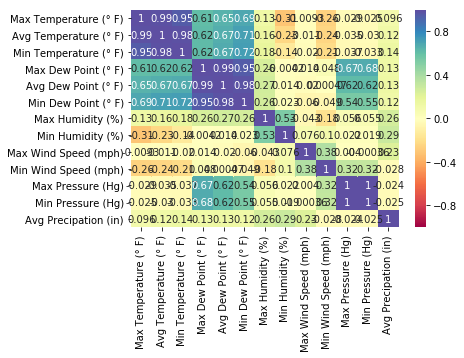

In [31]:

sns.heatmap(chi_weather_data.corr(), cmap="Spectral", annot=True, vmin=-1, vmax=1);

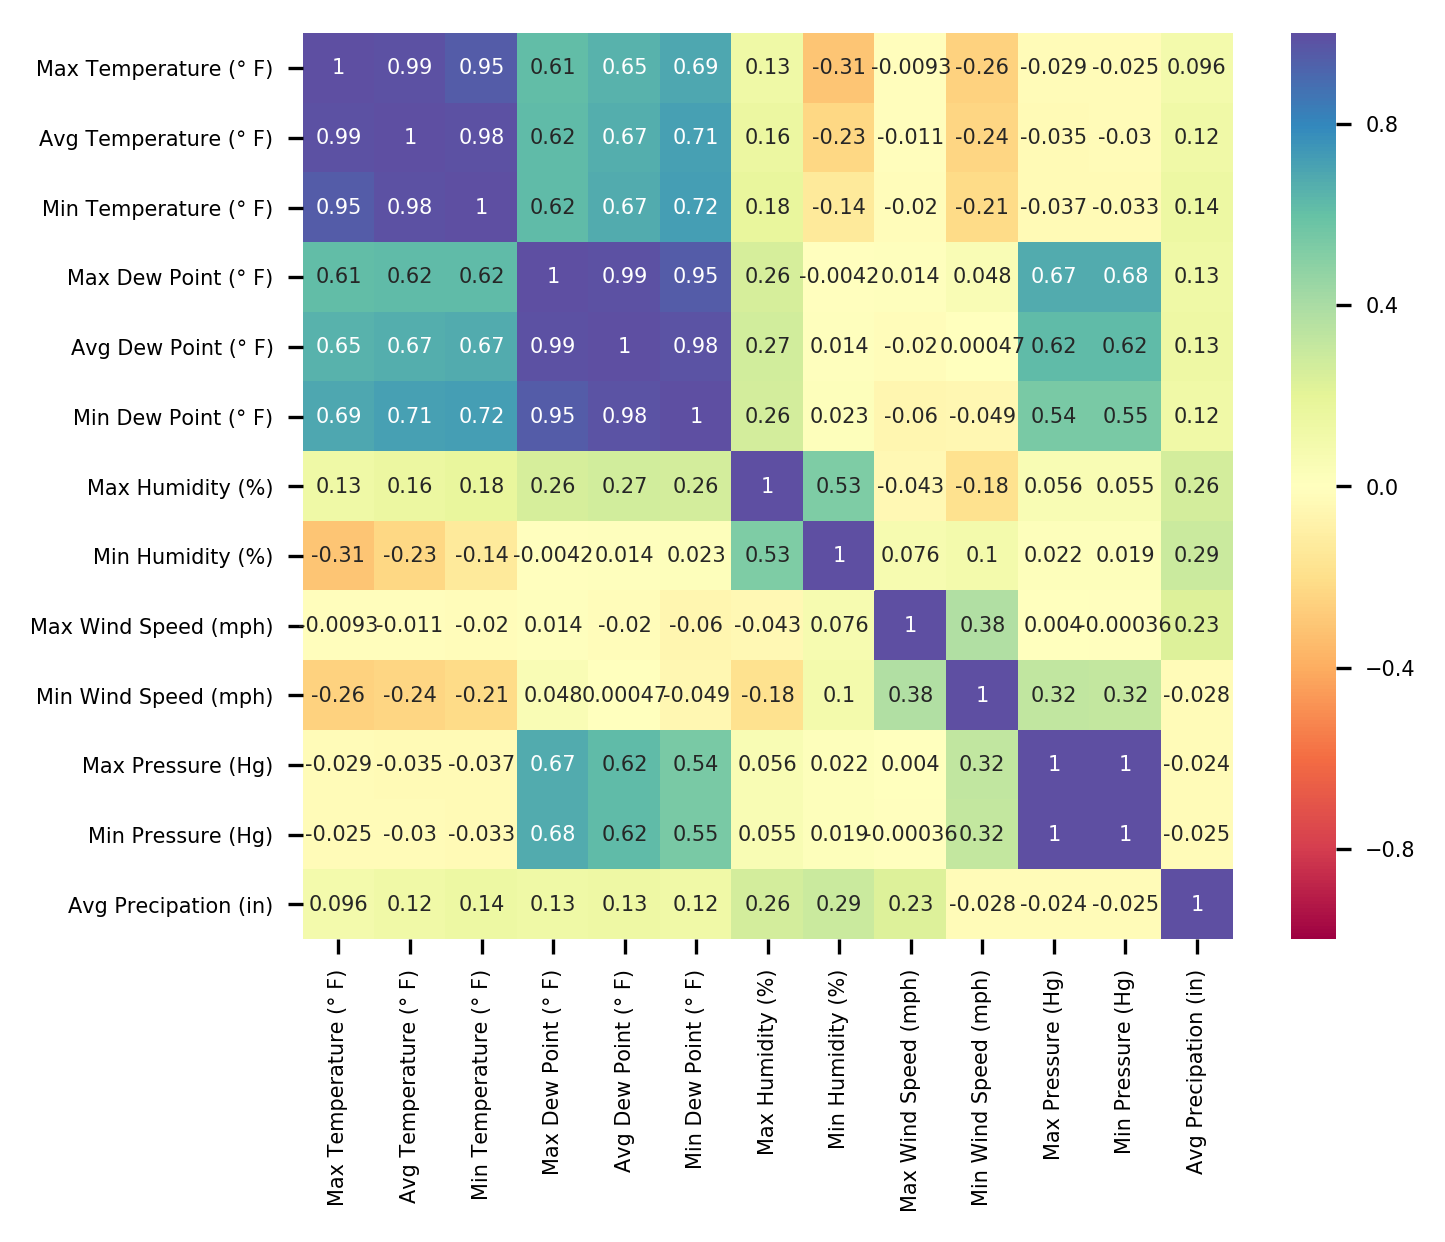

In [35]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (5, 4)
rcParams['figure.dpi'] = 300
rcParams['font.size'] = 5
sns.heatmap(chi_weather_data.corr(), cmap="Spectral", annot=True, vmin=-1, vmax=1);